# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# install pyreadstat
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 6.7 MB/s eta 0:00:00


# **Data Wrangling**

## load data

In [3]:
# read sav file
df = pd.read_spss("../input/students-math-score-for-different-teaching-style/1ResearchProjectData.sav")

In [4]:
# view random sample from data
df.sample(5)

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
19,20.0,Ruger,Male,Asian,Paid lunch,34.0,Ruger_Smith
92,93.0,Smith,Female,Caucasian,Paid lunch,79.0,Ruger_Smith
24,25.0,Ruger,Male,Asian,Free lunch,39.0,Ruger_Smith
107,108.0,Smith,Female,Hispanic,Free lunch,69.0,Ruger_Smith
152,153.0,Wesson,Female,Caucasian,Free lunch,61.0,Wesson


In [5]:
# some information about the data
# total 7 columns
# total 217 rows
# null value exist
# Inappropriate data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    217 non-null    category
dtypes: category(5), float64(2)
memory usage: 5.3 KB


## data cleaning

In [6]:
# clean missing values

# number of missing values
df.isnull().sum().sum()

6

In [7]:
# The number of missing data is very small so it is appropriate to delete it
# check missing again
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [8]:
# clean duplicates values

# there is no duplicates
df.duplicated().sum()

0

In [9]:
# convert Student column type to integers
df = df.astype({"Student": int}, errors='raise') 
# check type
df.Student.dtype

dtype('int64')

In [10]:
# confirm changes
df.head()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith


# **Exploratory Data Analysis**

### Q1: What is the number of male and female students? 

In [11]:
male_female_number = df.Gender.value_counts()
male_female_number

Male      120
Female     96
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Number of male and female'}>

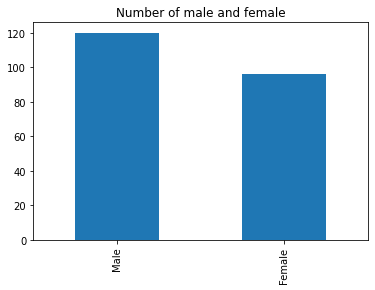

In [12]:
male_female_number.plot(kind='bar',title = "Number of male and female")

### Q2: How many students of each ethnic are in the dataset

In [13]:
# unique ethnic
df.Ethnic.unique()

['Asian', 'Hispanic', 'African-American', 'Caucasian']
Categories (4, object): ['African-American', 'Asian', 'Caucasian', 'Hispanic']

<AxesSubplot:title={'center':'Number of students of each ethnic'}>

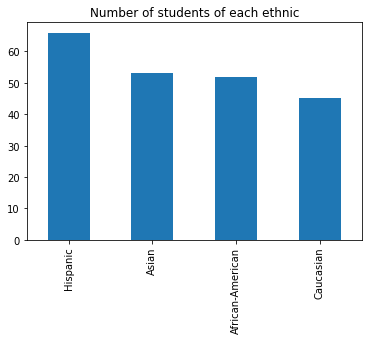

In [14]:
df.Ethnic.value_counts().plot(kind='bar', title = 'Number of students of each ethnic')

### Q3: What is the average score for students in general?

In [15]:
df.Score.mean()

65.27314814814815

### Q4: Does any gender have a higher score than the other?

<AxesSubplot:title={'center':'Average score by gender'}, xlabel='Gender'>

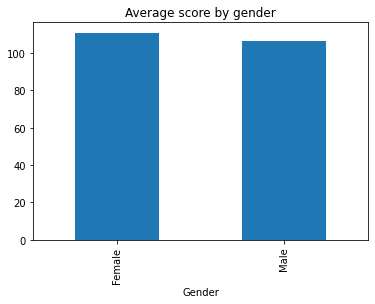

In [16]:
df.groupby('Gender')['Student'].mean().plot(kind='bar',title = 'Average score by gender')

### Q5: Does one ethnic have more score than the other?

<AxesSubplot:title={'center':'Average score by ethnic'}, xlabel='Ethnic'>

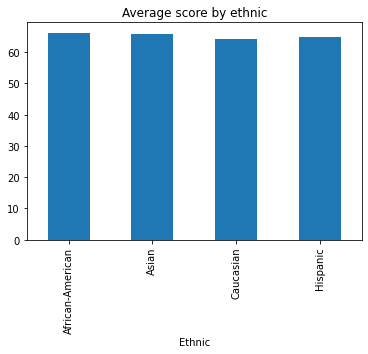

In [17]:
df.groupby('Ethnic')['Score'].mean().plot(kind = 'bar', title = 'Average score by ethnic')

Text(0.5, 1.0, 'Average score for each ethnic by gender')

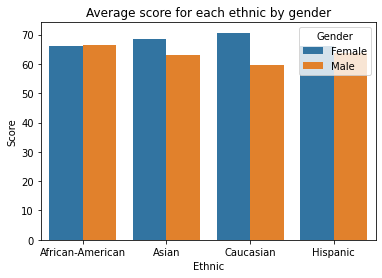

In [18]:
sns.barplot(data = df, x = 'Ethnic', y = 'Score', hue = 'Gender', ci = None)
plt.title('Average score for each ethnic by gender')

### Q6: In order to answer the questions that we will ask in the next lines, it will be useful to add a new column with the method of teaching based on the description provided about the data.

In [19]:
df.wesson.unique()

['Ruger_Smith', 'Wesson']
Categories (2, object): ['Ruger_Smith', 'Wesson']

In [20]:
# Ms.Ruger and Ms.Smith >>  standards-based
#  Ms.Wesson >> traditional
df['Teaching Method'] = np.where(df['wesson'] == 'Ruger_Smith', 'standards_based', 'traditional')
df.head()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson,Teaching Method
0,1,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith,standards_based
1,2,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith,standards_based
2,3,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith,standards_based
3,4,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith,standards_based
4,5,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith,standards_based


### Q6: What is the best way to teach students?

In [21]:
teaching_method_group = df.groupby('Teaching Method')['Score'].mean()
teaching_method_group

Teaching Method
standards_based    62.335714
traditional        70.684211
Name: Score, dtype: float64

<AxesSubplot:title={'center':'Average score according to the method of teaching'}, xlabel='Teaching Method'>

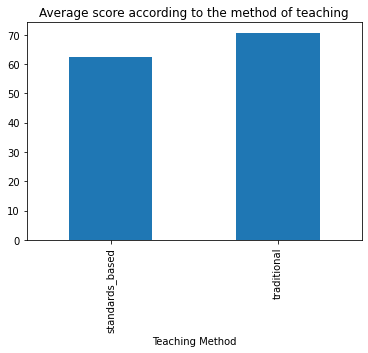

In [22]:
teaching_method_group.plot(kind = 'bar', title = 'Average score according to the method of teaching')

### Q7: Is there a method of teaching that suits a specific ethnic or gender for students? 

Text(0.5, 1.0, 'Average student scores for each ethnic by method of teaching')

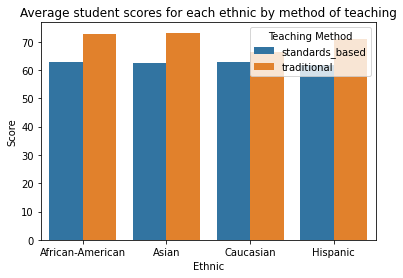

In [23]:
sns.barplot(data = df, x = 'Ethnic', y = 'Score', hue = 'Teaching Method', ci = None)
plt.title('Average student scores for each ethnic by method of teaching')

Text(0.5, 1.0, 'Average student scores for each gender by method of teaching')

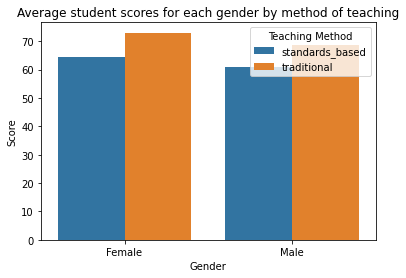

In [24]:
sns.barplot(data = df, x = 'Gender', y = 'Score', hue = 'Teaching Method', ci = None)
plt.title('Average student scores for each gender by method of teaching')

### Q8: Is there a favorite teacher of a particular ethnic?

Text(0.5, 1.0, 'Average student scores for each ethnic by Teacher')

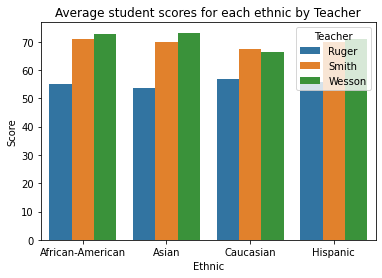

In [25]:
# Ms.Ruger >> African-American
# Ms.Smith >> Caucasian teach Spanish.
# Ms.Wesson >>  Caucasian.
sns.barplot(data = df, x = 'Ethnic' , y = 'Score', hue = 'Teacher', ci = None)
plt.title('Average student scores for each ethnic by Teacher')

### Q9: Do students who get free lunch get higher grades than others?

<AxesSubplot:title={'center':'Average student score by lunch price'}, xlabel='Freeredu'>

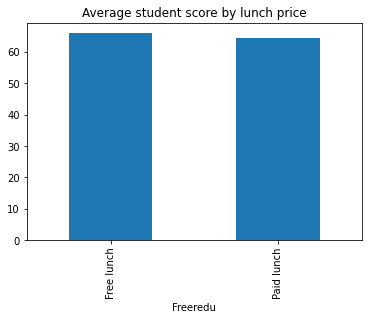

In [26]:
df.groupby('Freeredu')['Score'].mean().plot(kind = 'bar', title = 'Average student score by lunch price' )

# **Conclusions**

1. The percentage of male students is slightly higher than females, as they constitute 55 percent of the student population.
1. Hispanics make up the highest number of students while other ethnic groups have close numbers.
1. Males and females score similarly on average.
1. The lunch price does not affect the student's score.
1. Females get higher average scores than males in the Caucasian ethnic.
1. The traditional teaching method shows slightly better results than the other method for all students(taking into account gender and ethnicity).
1. Ms.Smith gives slightly better results with Caucasian and Hispanic students.
1. Ms.Ruger leads to the same results with African-Americans or with others.
1. Ms.Wesson gives the best results with all students.

In the end I recommend:
1.  Continuing to experiment between the traditional method and the standards-based method because the results are close so far, even if the traditional method showed that it is a little better. Despite that, we cannot be certain that it is the best.
1.  Ms.Wesson's theory that it is better to teach racially or socially compatible teachers with students is wrong and there must be other criteria for teacher preference, such as a background in mathematics.

# Limitations

1. The number of data is so small that we cannot be certain that our findings are accurate or reliable.
1. Other dimensions were not considered in the data, such as social environment, student intelligence, learning environment, or geographic area.